(416, 416, 3)

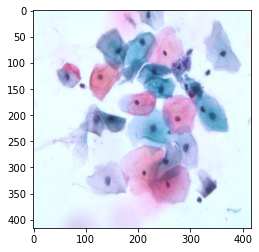

In [44]:
import PIL
from numpy import size
import torchvision.transforms.functional as transform
import os
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import torchvision.transforms.functional as TF
import numpy as np

cwd = os.getcwd()
img_file = os.getcwd()+'/supe_0067.jpg'
img = mpimg.imread(img_file)
plt.imshow(img)
img.shape


In [43]:

np.array(PIL.Image.open(img_file)).shape



(416, 416, 3)

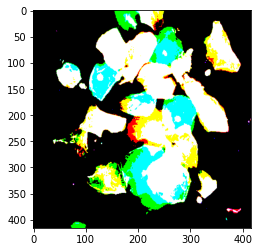

In [30]:
# mask T&F array [0] and to let meatrix become certain values
for i in range(3):
    mask = np.array([img[:,:,i].mean()>img[:,:,i] ])[0]
    
    img[:,:,i][mask] = 255
    # make it black
    img[:,:,i][~mask] = 0
plt.imshow(img)


In [82]:
mask.shape

(416, 416)

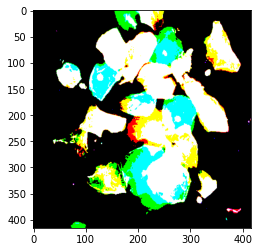

In [37]:
# save ths image, need to covert it back
img1 = PIL.Image.fromarray(img)
plt.imshow(img1)
img1.save('new_0067.jpg')

In [87]:

class KMeansClustering:
    def __init__(self, X, num_clusters,max_iterations=100):
        self.K = num_clusters
        self.max_iterations = 100
        self.num_examples = X.shape[0]
        self.num_features = X.shape[1]
        self.plot_figure = True

        # print((self.num_examples, self.num_features))

    def initialize_random_centroids(self, X):
        # print(self.num_features, X.shape)
        # print(np.zeros((self.K, self.num_features)))
        centroids = np.zeros((self.K, self.num_features))

        for k in range(self.K):
            centroid = X[np.random.choice(range(self.num_examples))]
            centroids[k] = centroid

        return centroids

    def create_clusters(self, X, centroids):
        # Will contain a list of the points that are associated with that specific cluster
        clusters = [[] for _ in range(self.K)]

        # Loop through each point and check which is the closest cluster
        for point_idx, point in enumerate(X):
            closest_centroid = np.argmin(
                np.sqrt(np.sum((point - centroids) ** 2, axis=1))
            )
            clusters[closest_centroid].append(point_idx)

        return clusters

    def calculate_new_centroids(self, clusters, X):
        # print(self.num_features, X.shape)
        
        centroids = np.zeros((self.K, self.num_features))
        for idx, cluster in enumerate(clusters):
            new_centroid = np.mean(X[cluster], axis=0)
            centroids[idx] = new_centroid

        return centroids

    def predict_cluster(self, clusters, X):
        y_pred = np.zeros(self.num_examples)

        for cluster_idx, cluster in enumerate(clusters):
            for sample_idx in cluster:
                y_pred[sample_idx] = cluster_idx

        return y_pred


    def plot_fig(self, X, y):
        plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
        plt.show()

    def fit(self, X):
        centroids = self.initialize_random_centroids(X)

        for it in range(self.max_iterations):
            clusters = self.create_clusters(X, centroids)

            previous_centroids = centroids
            centroids = self.calculate_new_centroids(clusters, X)
            diff = centroids - previous_centroids

            if not diff.any():
                print("Termination criterion satisfied")
                break

        # Get label predictions
        y_pred = self.predict_cluster(clusters, X)
        if self.plot_figure:
            self.plot_fig(X, y_pred)

        return y_pred , centroids , clusters


In [88]:
X = np.random.choice(range(10), (10,2))
model = KMeansClustering(X,2)

In [89]:
X
X.mean(axis=0)
for idx, k in enumerate(X):
    print(idx, k)
 

0 [7 0]
1 [8 3]
2 [8 3]
3 [9 8]
4 [8 7]
5 [1 2]
6 [1 7]
7 [6 4]
8 [5 9]
9 [6 5]


Termination criterion satisfied


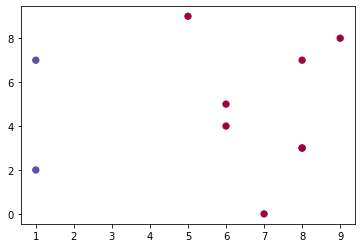

(array([0., 0., 0., 0., 0., 1., 1., 0., 0., 0.]),
 array([[7.125, 4.875],
        [1.   , 4.5  ]]),
 [[0, 1, 2, 3, 4, 7, 8, 9], [5, 6]])

In [90]:
# y_pred, cntroids = model.fit(X)
model.fit(X)

Termination criterion satisfied


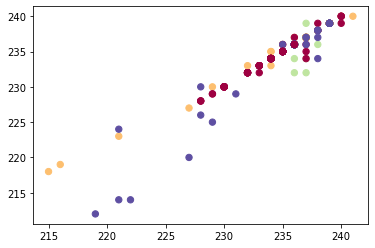

Termination criterion satisfied


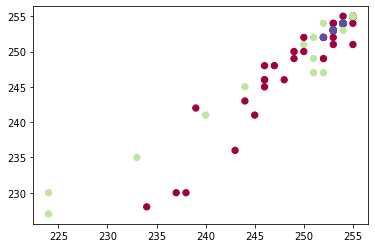

Termination criterion satisfied


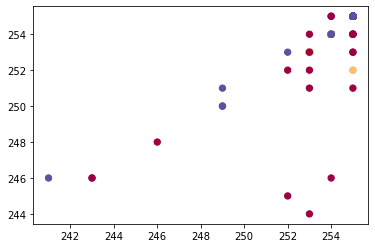

In [92]:
cent_list = []
clu_list = []
for i in range(3):
    X = img[:,:,i]
    model = KMeansClustering(X, 4)
    y_pred, centroids, clusters = model.fit(X)
    for idx, cluster in enumerate(clusters):
        break
        

In [94]:
clusters

AttributeError: 'list' object has no attribute 'shape'